<a href="https://colab.research.google.com/github/AdvancedProgrammingProject2022/MachineLearningPythonProject/blob/main/FS2022_Assignment_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8,789,1.00: Skills: Programming with Advanced Computer Languages


## Python Project: Supervised Machine Learning and Optimization, with MNIST dataset


### Created by: Yiwen Jin, Weiqi Liu

In this assignment, we practiced two supervised machine learning algorithms and the PCA optimisation by using the machine learning packages and MNIST dataset from sklearn in Python. We programmed the codes and combined the documentation in the Google Colab notebook.

After viewing the images data in MNIST dataset, we extracted the features of these data by implementing a Principal Component Analysis (PCA) on the dataset with 90% variance explained to accelerate the following training. 

We were interested in two algorithms: k-Nearest Neighbourhood (k-NN) and Support Vector Machine (SVM). We tested them both with original dataset and the features of the dataset after PCA. We compared the performance from two dimensions: the fit time and the accuracy rate. We also plotted the confusion matrices to figure out the mis-specified classes.  

# 1. Download the Packages and Dataset

Import the required packages for data processing.

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import the machine learning packages and MNIST dataset from sklearn.

In [2]:
# import from sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# import MNIST dataset from sklearn
mnist_data = fetch_openml("mnist_784")

Import the time module to record the run time.

In [4]:
# import time
import time

# 2. Create the Functions

Calculate the frequency of labels.

In [5]:
def cal_freq(freq_set):
  labels_freq = np.zeros(10)
  for i in freq_set:
    labels_freq[int(i)] += 1
  labels_freq = labels_freq / len(freq_set)
  return labels_freq

Plot the frequency.

In [6]:
def plot_freq(freq_set, labels_freq):
  freq_plot = plt.bar(x = range(10), height = labels_freq, width = 0.5, color = "skyblue", label = "Classes")
  plt.title("Distribution of MNIST, num = %d" % len(freq_set))
  plt.ylabel("Frequency")
  plt.xticks(range(10), range(10), rotation = "vertical")
  plt.show()

Plot the confusion matrix.

In [7]:
def plot_conf_mat(vali_set, pred_set, plot_title = "Confusion Matrix"):
  cm = confusion_matrix(vali_set, pred_set)
  plt.subplots(figsize=(10, 6))
  sns.heatmap(cm, annot = True, fmt = 'g', cmap="YlGnBu")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(plot_title)
  plt.show()

# 3. Explore the Dataset

`fetch_openml()` will return the requested dataset in the Bunch type. **Bunch** is a typical object in sklearn. It can be viewed as a  dictionary and the data can be got via attributes.

Bunch.data: A matrix of features.

Bunch.target: A dataframe automatically of features.


In [8]:
# check the type of mnist_data
type(mnist_data)

sklearn.utils.Bunch

In [9]:
# view the description of mnist_data 
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
# get the keys of mnist_data
mnist_keys = mnist_data.keys()
print(mnist_keys)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Get the images and labels from the Bunch MNIST.

In [11]:
# Get the images (dataframe) and the labels (series)
images = mnist_data["data"]
labels = mnist_data["target"]

In [12]:
# view the size of images and labels
print(images.shape)
print(labels.shape)

(70000, 784)
(70000,)


In [13]:
# view the classes of labels
labels_values = list(labels.unique())
print(labels_values)

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']


Split the 70000 images in MNIST into the training/validation/test set with the size of 40000, 10000 and 20000, seperately. 

The **training set** is to train the machine learning algorithm and let it learn the parameters. 

The **validation set** has the same distribution as the training set, and can be used to adjust the hyperparameters of the algorithm.

The **test set** is to test out-of-sample performance of the algorithm which performs the best on the validation set.

We assume that we have **no knowledge of any features and the class distribution of the test set** when testing our algorithm on it.

In [14]:
# set the lengths for the training/validation/test datasets
train_num = 40000
vali_num = 10000
test_num = 20000

# split the training/validation/test datasets
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=test_num, random_state=0)
images_train, images_vali, labels_train, labels_vali = train_test_split(images_train, labels_train, test_size=vali_num, random_state=0)

# reindex the dataframes of datasets
for i in  [images_train, labels_train]:
  i.index = range(0,train_num)
for i in  [images_vali, labels_vali]:
  i.index = range(0,vali_num)
for i in  [images_test, labels_test]:
  i.index = range(0,test_num)

View the summary statistics of the data and labels of the training set.

In [15]:
# summary statistics of the images
images_des = images_train.describe(percentiles = [])
print(images_des)

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  40000.0  40000.0  ...  40000.000000  40000.000000  40000.000000   
mean       0.0      0.0  ...      0.224750      0.094850      0.037825   
std        0.0      0.0  ...      6.411011      3.963136      2.461675   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      

In [16]:
# summary statistics of the lables
labels_des = labels_train.describe(percentiles = [])
print(labels_des)

count     40000
unique       10
top           1
freq       4538
Name: class, dtype: object


Visualize each class in the training set to get an impression of the handwritten numbers.

0-9 as Samples


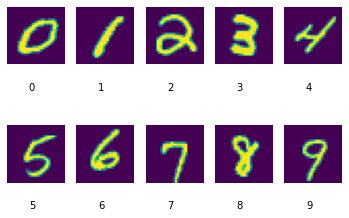

In [17]:
# plot samples from 0 to 9
plt.figure()

for i in range(10):
  # search the index for the corresponding image
  idx = list(labels_train).index(str(i))
  # get the image
  img = images_train.iloc[idx]
  img = np.array(img).reshape(28, 28)
  # set the nrows, ncols and position to be plotted
  plt.subplot(2, 5, (i+1))
  # plot the image
  plt.imshow(img)
  plt.axis("off")
  plt.text(10,40,str(i))

print("0-9 as Samples")
plt.show()

Plot the histogram of the training set and the validation set from MNIST. If the training/validation/test sets have a similar distribution across classes, the learning can be expected to perform well without further adjustments.

In [18]:
# the training set

# calculate the frequency
labels_train_freq = cal_freq(labels_train)
print(labels_train_freq)

[0.098975 0.11345  0.098975 0.10255  0.0983   0.089825 0.097325 0.104
 0.097475 0.099125]


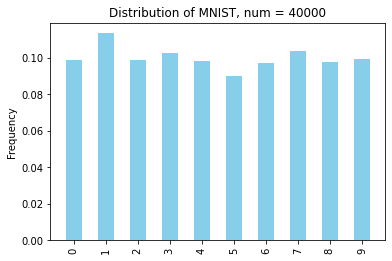

In [19]:
# plot the frequency
plot_freq(labels_train, labels_train_freq)

The plot above shows that in the training set, the 10 classes have almost the same frequency around 0.1, meaning that the classes are mostly balanced. 

In [20]:
# the validation set

# calculate the frequency
labels_vali_freq = cal_freq(labels_vali)
print(labels_vali_freq)

[0.0986 0.1076 0.1013 0.1025 0.0979 0.0893 0.1022 0.1042 0.0986 0.0978]


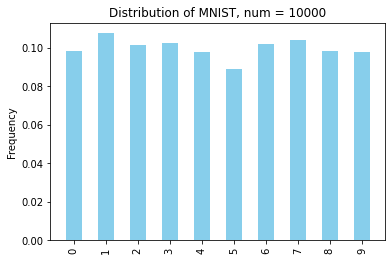

In [21]:
# plot the frequency
plot_freq(labels_vali, labels_vali_freq)

The 10 classes in the validation set are also balanced. 

Now we have acquired fully knowledge of the training and the validation sets from the MNIST dataset. For further data-preprocessing, we will run a principal component analysis to try to reduce the dimension of images data, which might increase the efficiency of training and prediction.

# 4. Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a linear dimensionality reduction algorithm. 

PCA uses the orthogonal transformation to project the linear dependent vectors into the linear independent basis, which allows each new component captures the most variance of the original vectors. 

The `PCA()` is embedded in the sklearn, which can fit and return the set of principal components. The **order** of principal components is determined according to the fraction of variance of original dataset they explain. 

We will apply `PCA()` on the training set and apply the same transoformation on the validation and the test set.

In [22]:
# nomalization of the train set and the test set before PCA
images_train_norm = images_train / 255.0
images_vali_norm = images_vali / 255.0
images_test_norm = images_test / 255.0

Create the PCA function that return the components which can explain 90% variance all together. 

In [23]:
# import PCA
from sklearn.decomposition import PCA

In [24]:
# set the variance parameter to be .9
pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)

# fit the PCA on the training set
pca.fit(images_train_norm)

PCA(n_components=0.9)

View the principal components and explained variance. 

For the training set, it requires only **87 principal components** to capture **90% variance** of the 28×28 = 784 pixels from the original images, and the first component can explain around 10% of variance. This shows that there is considerable redundancy in the original dataset.

In [25]:
# check how many components required to explain 90% variance
num_var90 = pca.n_components_
print(num_var90)

87


In [26]:
# check how much variance the first 5 component explained
num_var_view = 10 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_[:num_var_view]))

Explained variation per principal component: [0.0975182  0.07180617 0.06170037 0.05383194 0.0486514  0.04304227
 0.03293654 0.02908197 0.02793572 0.02337926]


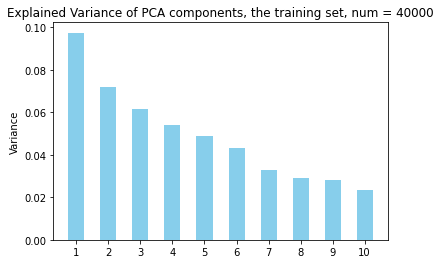

In [27]:
# plot the explained variance
freq_plot = plt.bar(x = range(1,num_var_view+1), height = pca.explained_variance_ratio_[:num_var_view], width = 0.5, color = "skyblue", label = "Components")

plt.title("Explained Variance of PCA components, the training set, num = %d" % train_num)
plt.ylabel("Variance")
plt.xticks(range(1,num_var_view+1), range(1,num_var_view+1))

plt.show()

Transform the original images data of the training/validation/test sets into principal components with the weights learned from the training set. These principal components can be used in substituion of the original data in the following supervised machine learnings.

In [28]:
# use PCA weights to transform the train and the test data
images_train_pca = pca.transform(images_train_norm)
images_vali_pca = pca.transform(images_vali_norm)
images_test_pca = pca.transform(images_test_norm)

# view the size of images and labels after pca
print(images_train_pca.shape)
print(images_vali_pca.shape)
print(images_test_pca.shape)

(40000, 87)
(10000, 87)
(20000, 87)


In addition, let's view **the first two components** and plot them in **a two-way scatter plot**, to see how much they can classify the 10 classes. 

From the sns plot, we can see that 1s and 0s seem to lie at the left and the right sides separately, showing that the first two components can somewhat distinguish between these two classes.

In [29]:
images_train_pca_df = pd.DataFrame(data = images_train_pca[:,0:2],
             columns = ['Principal Component 1', 'Principal Component 2'])
images_train_pca_df['y'] = labels_train
images_train_pca_df.head()

,Principal Component 1,Principal Component 2,y
0,1.454036,-1.929864,3
1,-0.657584,3.692021,7
2,-3.077043,-2.357967,1
3,-1.367160,3.095699,9
4,-2.794929,-1.313927,1


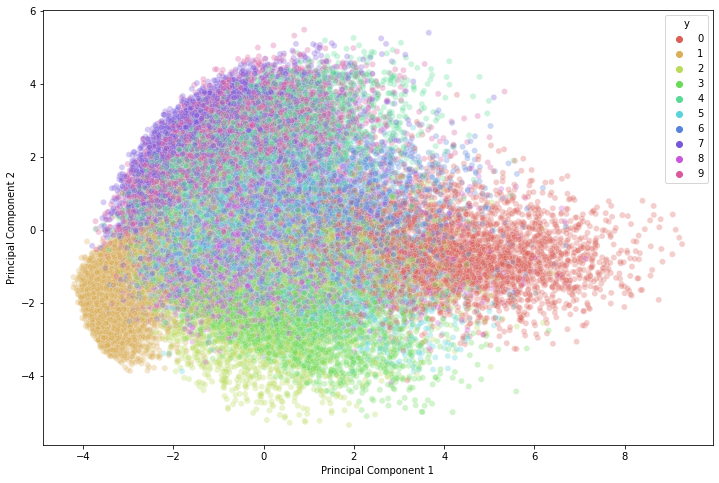

In [30]:
# plot the first two components
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=images_train_pca_df,
    legend="full",
    alpha=0.3,
)

Next, we are going to compare the kNN and SVM performances with the original data and the principal components in the following three sections.

# 5. k-Nearest Neighborhood (KNN)

kNN is a non-parametric supervised learning method. 

kNN classifier determines the class of a data point by majority voting principle. “Closest” is defined via a measure of distance, such as the Euclidean distance.

k is a tuning parameter in the kNN classifier (validation). The biggest challenge of kNN is to determine the optimal value for k. 

Advantage:
kNN is simple and easy to interpret.

Disadvantages: 
kNN is sensitive to outliers.kNN can become very slow when the number of data points increases because the model needs to store all data points.

We run the algorithm with the data after Principle Component Analysis (PCA). Besides, we take the running time and accuracy into consideration when make the comparsion to other algorithm.

In [31]:
# import kNN
from sklearn.neighbors import KNeighborsClassifier 

## 5.1 kNN with Originial Images

In [32]:
# assign the training and the test data
trainData = images_train
trainLabel = labels_train
testData = images_vali
testLabel = labels_vali

Run a naive sample with the number of neighbors as 5 by default in sklearn.

In [33]:
# naive kNN
knn = KNeighborsClassifier(algorithm='kd_tree')
T1 = time.perf_counter()
train_knn = knn.fit(trainData, trainLabel)
T2 = time.perf_counter()
score_knn = knn.score(testData, testLabel)

# view the prediction results
print("Time to fit the model (test set size: %d): %.4f minutes" % (train_num, (T2-T1)/60))
print("Score of the model on the validation set: %.4f" % score_knn)

Time to fit the model (test set size: 40000): 0.0847 minutes
Score of the model on the validation set: 0.9675


A **confusion matrix** is used as a tool to validate the accuracy of k-NN classification. The **xlabel shows the prediction** on the validation set, while **the ylabel shows the ground truth**. The diagonal are the numbers of correct predictions, while the remainings are the wrong ones. 

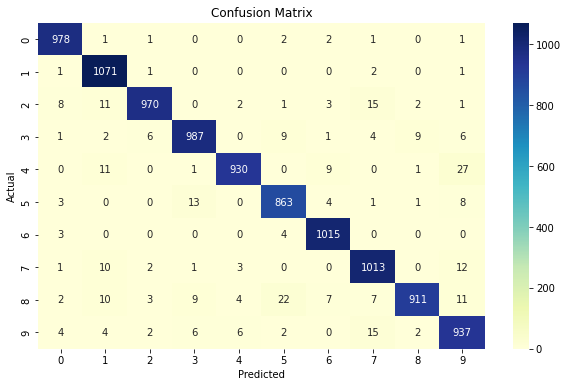

In [34]:
# plot confusion matrix
pred_knn = knn.predict(images_vali)
plot_conf_mat(testLabel, pred_knn)

## 5.2 kNN with Principal Components of Images

Run the kNN with the samples after Principal Components Analysis.

In [35]:
# assign the training and the test data
trainData = images_train_pca
trainLabel = labels_train
testData = images_vali_pca
testLabel = labels_vali

Evaluate a score of kNN by 5-fold cross-validation.

Calculate and plot the accuracy of the kNN by choosing different K. From the graph, we get the highest accuracy at K = 3.

In [36]:
# import search method
from sklearn.model_selection import cross_val_score

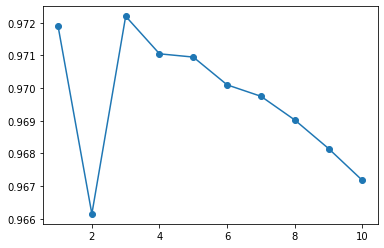

In [37]:
# search the best k with a loop
acc_pca = []
for i in range(1,11):
     knn = KNeighborsClassifier(n_neighbors = i)
     acc_pca.append(cross_val_score(knn,trainData,trainLabel,cv=5).mean())

# plot the accuracy
plt.plot(range(1,11),acc_pca,'o-')
plt.show()

We got the best k and its score of the model and the running time. In the confusion matrix, we found the model has successfully predicted the majority.

In [38]:
# best kNN
best_k = acc_pca.index(min(acc_pca)) + 1
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors = best_k)
T1 = time.perf_counter()
train_pca_knn = knn.fit(trainData, trainLabel)
T2 = time.perf_counter()
score_pca_knn = knn.score(testData, testLabel)

# view the prediction results
print("Time to fit the model (test set size: %d): %.4f minutes" % (train_num, (T2-T1)/60))
print("Score of the model on the validation set: %.4f" % score_pca_knn)

Time to fit the model (test set size: 40000): 0.0108 minutes
Score of the model on the validation set: 0.9657


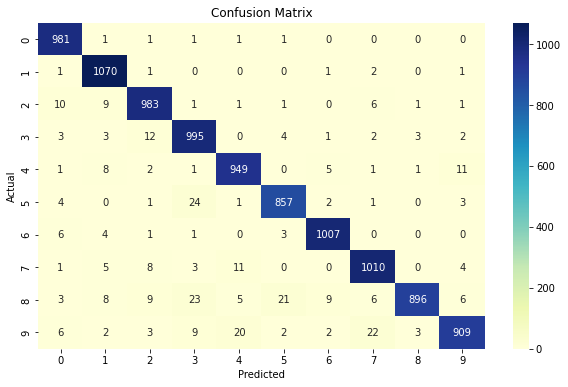

In [39]:
# plot confusion matrix
pred_pca_knn = knn.predict(testData)
plot_conf_mat(testLabel, pred_pca_knn)

By using the kNN model, with the best k, the model capture the data with 96.57% accurate rate and it takes 0.0111 minutes.

# 6. Support Vector Machine (SVM)

Support Vector Machine is a supervised machine learning algorithm, which generates a **decision boundary** to separate the classes. The name, support vectors, refer to the data points that are close to the decision boundary, and the decision boundary is drawn in a way to maximize the distance to them.

Usually, all data points cannot be perfectly seperated by a simple linear boundary. To solve this problem, different **kernels** can be tested to map the original data into a linear-separable space; more, an **tolerance of mis-specified data points** can sometime improve the classification and generalization of SVM. 

In this section, we will firstly try naive SVM settings on the original MNIST data and the principal components. Then, we apply grid search to adjust for the kernel and the hyperparameters, gamma and C. The fit time and accuracy will be considered to select a best SVM setting on MNIST.

First of all, import the `svm` function from sklearn.

In [40]:
# import SVM
from sklearn import svm

## 6.1 Naive Example with LinearSVC()

Let's start with a naive SVM with linear kernel. The algorithm `LinearSVC()` is especially embedded in sklearn and performs faster than passing the linear kernel parameter to `svm`.

In [41]:
# set a set of naive parameters
svc_model = svm.LinearSVC(C=1)

In [42]:
# fit the model
# record the time
T1 = time.perf_counter()
naive_model = svc_model.fit(images_train, labels_train)
T2 = time.perf_counter()

# score the fitness within the model
naive_train_score = svc_model.score(images_train, labels_train)

# view the fitness results
print("Time to fit the model (training set size: %d): %.4f minutes" % (train_num, (T2-T1)/60))
print("Score of the model: %.4f" % naive_train_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Time to fit the model (training set size: 40000): 2.3559 minutes
Score of the model: 0.8972


Test the estimated naive SVM in the validation set.

In [43]:
# test the performance
T1 = time.perf_counter()
naive_vali_score = svc_model.score(images_vali, labels_vali)
T2 = time.perf_counter()

# view the prediction results
print("Time to fit the model (test set size: %d): %.4f minutes" % (vali_num, (T2-T1)/60))
print("Score of the model: %.4f" % naive_vali_score)

Time to fit the model (test set size: 10000): 0.0015 minutes
Score of the model: 0.8714


Draw a confusion matrix.

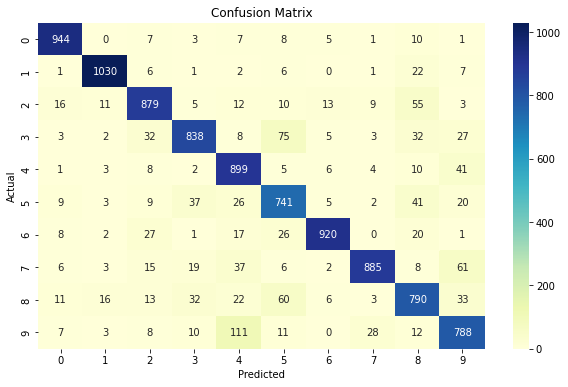

In [44]:
# get the predictions
labels_predict = svc_model.predict(images_vali)

# plot the confusion matrix
plot_conf_mat(labels_vali, labels_predict)

## 6.2 Naive Example with Principal Components

Substitute the training set data with the principal components, and repeat the procedures in 6.1. 

In [45]:
# set a set of naive parameters
svc_model = svm.LinearSVC(C=1)

In [46]:
# fit the model
# record the time
T1 = time.perf_counter()
naive_model = svc_model.fit(images_train_pca, labels_train)
T2 = time.perf_counter()

# score the fitness within the model
naive_train_pca_score = svc_model.score(images_train_pca, labels_train)

# view the fitness results
print("Time to fit the model (training set size: %d): %.4f minutes" % (train_num, (T2-T1)/60))
print("Score of the model: %.4f" % naive_train_pca_score)

Time to fit the model (training set size: 40000): 0.9661 minutes
Score of the model: 0.9095


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Test the estimated naive SVM in the validation set of principal components.

In [47]:
# test the performance
T1 = time.perf_counter()
naive_vali_pca_score = svc_model.score(images_vali_pca, labels_vali)
T2 = time.perf_counter()

# view the prediction results
print("Time to fit the model (test set size: %d): %.4f minutes" % (vali_num, (T2-T1)/60))
print("Score of the model: %.4f" % naive_vali_pca_score)

Time to fit the model (test set size: 10000): 0.0005 minutes
Score of the model: 0.9056


Draw a confusion matrix.

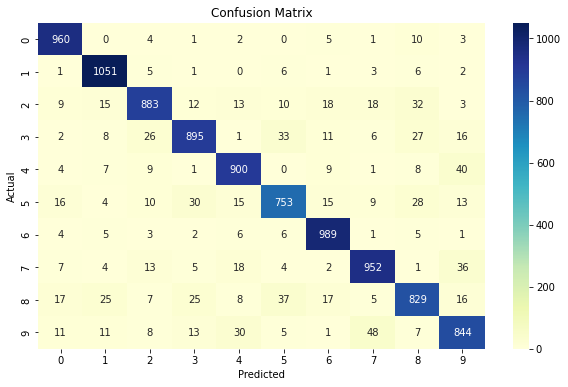

In [48]:
# get the predictions
labels_pca_predict = svc_model.predict(images_vali_pca)

# plot the confusion matrix
plot_conf_mat(labels_vali, labels_pca_predict)

We can see, employing the principal components in fact both **reduce the training time** from 1.95 minutes to 0.96 minutes, and **improve the accuracy** on the validation set from 86.33% to 90.56%. 

Particularly, from the confusion matrix, for example, the principal components perform better when classify 3s and 6s, which tend to be wrongly predicted as 2s with the original data. This is probably because the principal components help to capture the major feature of the images.

## 6.3 Grid Search

The naive SVM with principle component data performs not bad with an accuracy score of 90.59% on the validation set. To further improve the performance, we then turn to tuning/hyperparameter optimization. 

**Tuning/hyperparameter optimization** is a procedure to find a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. Regarding to our SVM, we will focus on the kernel function form, kernel coefficient gamma, and regularization parameter C.

**Grid research** is a traditional technique for tuning, which is to search for the parameter with the highest accuracy in cross-validation within a range of parameters. sklearn provides a function `GridSearchCV` to combine the parameters set and implement the grid research. 


In 6.3, we apply the grid search on our **training set** to find the best hyperparameters.

In [49]:
# import the function for grid search
from sklearn.model_selection import GridSearchCV 

### 6.3.1 Linear Kernel, search for C

The **hyperparameter C** is a **regularization parameter**. The strength of the regularization, which means the tolerance of mis-classification, is inversely proportional to C. A larger C tends to choose a hyperplane with larger margin, even this will lead to more wrong classifications; conversely, a smaller C will yield a hyperplane with smaller margin. The performances with different Cs depend on how much the classes in the test set are separable. 

In 6.3.1, we search for the best C around 1, ranging from 0.1 to 10.

In [50]:
# set the SVM with linear kernel
svc_model = svm.LinearSVC(random_state = 1234)

# set the Cs to be searched
parameter_set_linear = {'C':[0.1, 1, 5, 10]}

In [51]:
# grid search
gs_svc = GridSearchCV(svc_model,parameter_set_linear,cv=3,scoring='accuracy',n_jobs=-1)
gs_svc.fit(images_train_pca,labels_train)

# get the grid search results
gs_results_linear = gs_svc.cv_results_
gs_best_params_linear = gs_svc.best_params_
gs_best_score_linear = gs_svc.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [52]:
# view all the search results
gs_results_linear = pd.DataFrame(gs_results_linear)
gs_results_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.792084,0.558231,0.031337,0.000731,0.1,{'C': 0.1},0.905880,0.905573,0.906098,0.905850,0.000215,2
1,49.620977,1.376224,0.030553,0.000278,1,{'C': 1},0.905805,0.906173,0.906998,0.906325,0.000499,1
2,71.500662,0.574598,0.030645,0.000543,5,{'C': 5},0.905580,0.904148,0.904973,0.904900,0.000587,3
3,79.096728,6.756025,0.026877,0.004818,10,{'C': 10},0.901080,0.899122,0.899197,0.899800,0.000906,4


In [53]:
# print the best C and the score
print(gs_best_params_linear)
print(gs_best_score_linear)

{'C': 1}
0.9063250130075811


With in our search range and with 3-fold cross validation, we find that for a linear kernel, on MNIST, C=1 performs the best with an accuracy score of **90.63%** on the training set (potential variation due to random state).

### 6.3.2 Polynomial Kernel, search for degree, gamma and C

The **polynomial kernel** is defined in libsvm/sklearn as: 
$$(\gamma<x', x> + r)^d$$
where  d is specified by parameter `degree`, r by `coef0`. Gamma is a scaling factor to control for the length of data vector.

In 6.3.2, in addition to C, we search for the degree d and the gamma to fit the training set from MNIST the best. The r, which is coef0, is set by default as 0 in `SVC()`.

In [54]:
# set the SVM with polynomial kernel
svc_model = svm.SVC(kernel = 'poly', random_state = 1234)

# set the gammas and Cs to be searched
parameter_set_poly = {'degree':[2, 3, 4], 'gamma':[0.001, 0.01, 0.1], 'C':[0.1, 1, 10]}

In [55]:
# grid search
gs_svc = GridSearchCV(svc_model,parameter_set_poly,cv=3,scoring='accuracy',n_jobs=-1)
gs_svc.fit(images_train_pca,labels_train)

# get the grid search results
gs_results_poly = gs_svc.cv_results_
gs_best_params_poly = gs_svc.best_params_
gs_best_score_poly = gs_svc.best_score_

In [56]:
# view all the search results
gs_results_poly = pd.DataFrame(gs_results_poly)
gs_results_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,170.398130,5.313366,46.787211,0.094854,0.1,2,0.001,"{'C': 0.1, 'degree': 2, 'gamma': 0.001}",0.113469,0.113478,0.113403,0.113450,0.000034,22
1,81.646779,2.174205,28.588904,0.708141,0.1,2,0.01,"{'C': 0.1, 'degree': 2, 'gamma': 0.01}",0.932653,0.928898,0.931973,0.931175,0.001634,15
2,15.917284,0.146377,7.863006,0.086487,0.1,2,0.1,"{'C': 0.1, 'degree': 2, 'gamma': 0.1}",0.978626,0.975324,0.977799,0.977250,0.001403,5
3,183.007871,6.613121,46.912447,1.014367,0.1,3,0.001,"{'C': 0.1, 'degree': 3, 'gamma': 0.001}",0.113469,0.113478,0.113403,0.113450,0.000034,22
4,135.419903,3.970394,39.299483,1.125067,0.1,3,0.01,"{'C': 0.1, 'degree': 3, 'gamma': 0.01}",0.832383,0.836196,0.838746,0.835775,0.002615,18
5,23.211226,0.704022,9.362556,0.078217,0.1,3,0.1,"{'C': 0.1, 'degree': 3, 'gamma': 0.1}",0.981401,0.979074,0.981775,0.980750,0.001195,1
6,191.293948,7.345365,48.479364,0.293160,0.1,4,0.001,"{'C': 0.1, 'degree': 4, 'gamma': 0.001}",0.113469,0.113478,0.113403,0.113450,0.000034,22
7,175.209149,5.311134,46.581245,1.072305,0.1,4,0.01,"{'C': 0.1, 'degree': 4, 'gamma': 0.01}",0.401605,0.412885,0.412360,0.408950,0.005198,20
8,37.971339,1.137701,12.392479,0.291075,0.1,4,0.1,"{'C': 0.1, 'degree': 4, 'gamma': 0.1}",0.976226,0.973824,0.975024,0.975025,0.000981,9
9,181.973616,4.453863,47.197627,0.548172,1,2,0.001,"{'C': 1, 'degree': 2, 'gamma': 0.001}",0.585646,0.575339,0.570164,0.577050,0.006435,19


In [57]:
# print the best gamma, C and the score
print(gs_best_params_poly)
print(gs_best_score_poly)

{'C': 0.1, 'degree': 3, 'gamma': 0.1}
0.9807499837263443


Applying the polynomial kernel with the degree of 3 largely improve our best prediction accuracy in 3-fold validation to be **98.07%** (potential variation due to random state).

# 7. Test the best kNN and SVM model on the test set

Under the consideration of both accuracy and time efficiency, we use **the PCA results** as inputs for machine learning predictions. 

Before all tests, combine the training set and the validation set again by pandas to make a new training set with the size of 50000 labeled images.

In [58]:
# concatnate the validation set into the training set
images_train_pca_all = pd.concat([pd.DataFrame(images_train_pca), pd.DataFrame(images_vali_pca)])
labels_train_all = pd.concat([pd.DataFrame(labels_train), pd.DataFrame(labels_vali)])

# reindex the dataframes of datasets
for i in  [images_train_pca_all, labels_train_all]:
  i.index = range(0,train_num + vali_num)

# view the shape
print(images_train_pca_all.shape)
print(labels_train_all.shape)

(50000, 87)
(50000, 1)


Test **the best kNN model, with k = 3**.

In [59]:
# best kNN
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors = best_k)
T1 = time.perf_counter()
train_pca_knn_best = knn.fit(images_train_pca_all, labels_train_all)
T2 = time.perf_counter()
score_pca_knn_best = knn.score(images_test_pca, labels_test)
time_knn = (T2-T1)/60

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Report the fit time on the training set, accuracy on the test set, and the confusion matrix.

In [60]:
# view the prediction results
print("Time to fit the best kNN on the training set (train set size: %d): %.4f minutes" % (train_num + vali_num, time_knn))
print("Score of the best kNN on the test set (test set size: %d): %.4f" % (test_num, score_pca_knn_best))

Time to fit the best kNN on the training set (train set size: 50000): 0.0148 minutes
Score of the best kNN on the test set (test set size: 20000): 0.9702


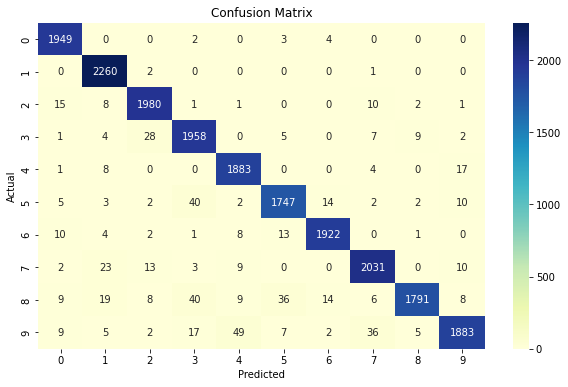

In [61]:
# plot confusion matrix
pred_pca_knn_best = knn.predict(images_test_pca)
plot_conf_mat(labels_test, pred_pca_knn_best)

Test **the best SVM, with polynomial kernel, degree = 3, gamma = 0.1, C = 0.1**. 

In [62]:
# best SVM
svc_model = svm.SVC(kernel = 'poly', degree = 3, gamma = 0.1, C = 0.1, random_state = 1234)
T1 = time.perf_counter()
train_pca_svm_best = svc_model.fit(images_train_pca, labels_train)
T2 = time.perf_counter()
score_pca_svm_best = svc_model.score(images_test_pca, labels_test)
time_svm = (T2-T1)/60

Report the fit time on the training set, accuracy on the test set, and the confusion matrix.

In [63]:
# view the prediction results
print("Time to fit the best SVM on the training set (train set size: %d): %.4f minutes" % (train_num + vali_num, time_svm))
print("Score of the best SVM on the test set(test set size: %d): %.4f" % (test_num, score_pca_svm_best))

Time to fit the best SVM on the training set (train set size: 50000): 0.4070 minutes
Score of the best SVM on the test set(test set size: 20000): 0.9823


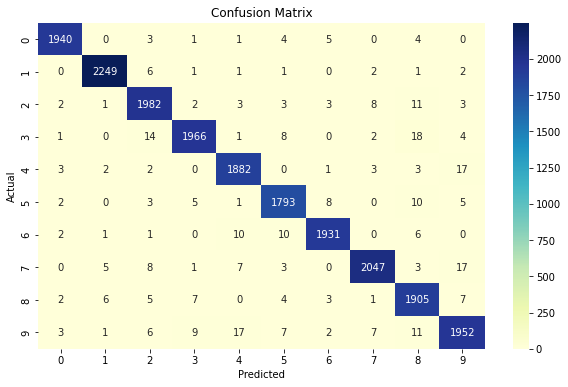

In [64]:
# plot confusion matrix
pred_pca_svm_best = svc_model.predict(images_test_pca)
plot_conf_mat(labels_test, pred_pca_svm_best)

# 8. Conclusion

In this project, we explored the MNIST dataset and used two popular supervised machine learning algorithms, k-Nearest Neighborhood (k-NN) and Support Vector Machine (SVM) to learn the image features and make the predictions.

We evaluated the performance of the algorithms with two dimensions: **fit time** and **accuracy**. After training the algorithms on the training set and testing the performance on the validation set, we find the best setting as the following:



Use the `tabulate` package to draw a table of best k-NN and SVM results above, which are trained on the training set with the size of 50000, and are tested on the test set with the size of 20000.

In [65]:
# import tabulate
from tabulate import tabulate

In [66]:
# define the result line of k-NN and SVM
line_knn = ['k-NN', 'With PCA, n = 87', 'k = 3', time_knn, score_pca_knn_best]
line_svm = ['SVM', 'With PCA, n = 87', 'polynomial, degree = 3, gamma = 0.1, C = 0.1', time_svm, score_pca_svm_best]

# create a table of results
res_table = [['Algorithms', 'With/Without PCA', 'Best Setting','Fit Time', 'Accuracy'], line_knn, line_svm]

In [67]:
# format and print the table
print(tabulate(res_table, headers='firstrow', tablefmt='grid'))

+--------------+--------------------+----------------------------------------------+------------+------------+
| Algorithms   | With/Without PCA   | Best Setting                                 |   Fit Time |   Accuracy |
+==============+====================+==============================================+============+============+
| k-NN         | With PCA, n = 87   | k = 3                                        |  0.0147694 |    0.9702  |
+--------------+--------------------+----------------------------------------------+------------+------------+
| SVM          | With PCA, n = 87   | polynomial, degree = 3, gamma = 0.1, C = 0.1 |  0.406972  |    0.98235 |
+--------------+--------------------+----------------------------------------------+------------+------------+


The table indicates that, under the best settings and with the PCA feature extraction, the k-NN ran faster than the SVM, while the SVM performed slightly better on the accuracy than the k-NN. Overall, both the algorithms achieved an accuracy score **over 95%** and only remained few abnormal or very similar images wrongly specified. 

# 9. References

**Python Tutorials**

sklearn: https://scikit-learn.org

Download MNIST: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html

Cross Validation Function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Grid Search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Results Table: https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd

**Machine Learning Tutorials**

Principal Component Analysis (PCA): https://www.datacamp.com/tutorial/principal-component-analysis-in-python

k-Nearest Neighbourhoods (k-NN): https://towardsdatascience.com/15-must-know-machine-learning-algorithms-44faf6bc758e
https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f

Support Vector Machine (SVM):
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#svm

https://towardsdatascience.com/15-must-know-machine-learning-algorithms-44faf6bc758e

https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html

Tuning for SVM:
https://aqsa-qadir44.medium.com/tuning-parameters-of-svm-kernel-regularization-gamma-and-margin-5f2f6639121a
